In [1]:
import tensorflow as tf
import math
print("TensorFlow version:", tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory

TensorFlow version: 2.9.2


In [2]:
def FCN_model(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="valid", input_shape=shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(tf.keras.layers.Conv2D(filters=119, kernel_size=3, strides=1))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(tf.keras.layers.Conv2D(filters=340, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=356, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


    model.add(tf.keras.layers.Conv2D(filters=110, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=129, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    
    model.add(tf.keras.layers.Conv2D(filters=369, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))


    model.add(tf.keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalMaxPooling2D())
    model.add(tf.keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model


In [3]:
fcn0=FCN_model(len_classes=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     2560      
                                                                 
 batch_normalization (BatchN  (None, 225, 225, 256)    1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 225, 225, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 119)     274295    
                                                                 
 activation_1 (Activation)   (None, 111, 111, 119)     0

In [4]:
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3
train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=(227,227) ,\
      subset='training',seed=5, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=(227,227), subset='validation',seed=5,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=(227,227), batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [5]:
fcn0.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = fcn0.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 63s 633ms/step - loss: 0.7923 - binary_accuracy: 0.5111 - val_loss: 0.9404 - val_binary_accuracy: 0.4947
Epoch 2/100
89/89 [==============================] - 52s 585ms/step - loss: 0.7351 - binary_accuracy: 0.5209 - val_loss: 0.7182 - val_binary_accuracy: 0.5053
Epoch 3/100
89/89 [==============================] - 52s 585ms/step - loss: 0.7067 - binary_accuracy: 0.5482 - val_loss: 0.7760 - val_binary_accuracy: 0.5357
Epoch 4/100
89/89 [==============================] - 52s 585ms/step - loss: 0.6816 - binary_accuracy: 0.5827 - val_loss: 0.6504 - val_binary_accuracy: 0.6450
Epoch 5/100
89/89 [==============================] - 52s 585ms/step - loss: 0.6491 - binary_accuracy: 0.6163 - val_loss: 0.7872 - val_binary_accuracy: 0.5053
Epoch 6/100
89/89 [==============================] - 52s 584ms/step - loss: 0.5967 - binary_accuracy: 0.6827 - val_loss: 0.7446 - val_binary_accuracy: 0.5053
Epoch 7/100
89/89 [==============================] -

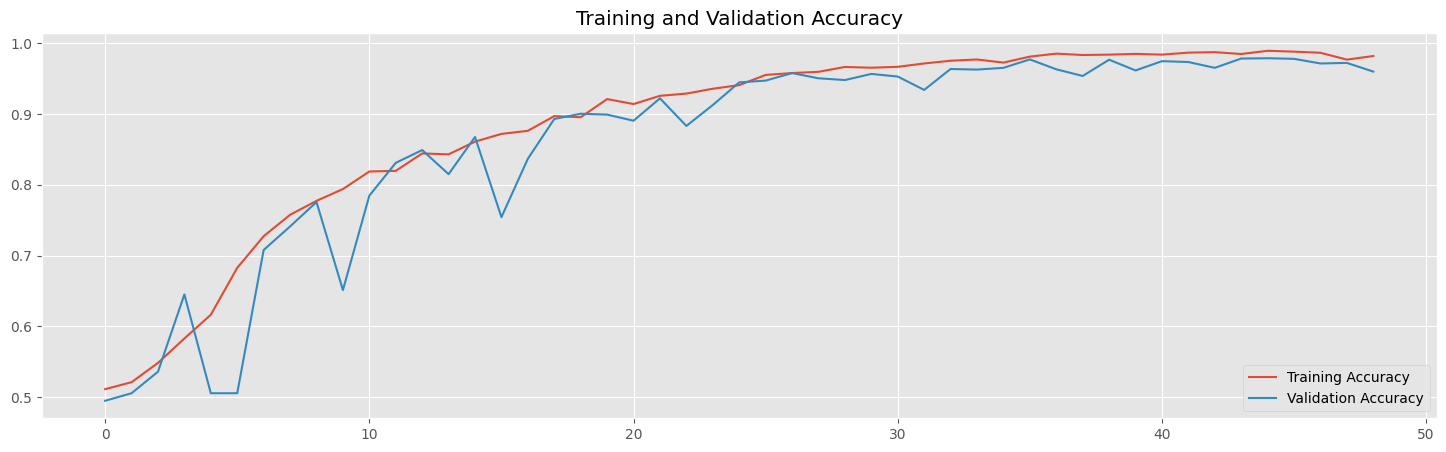

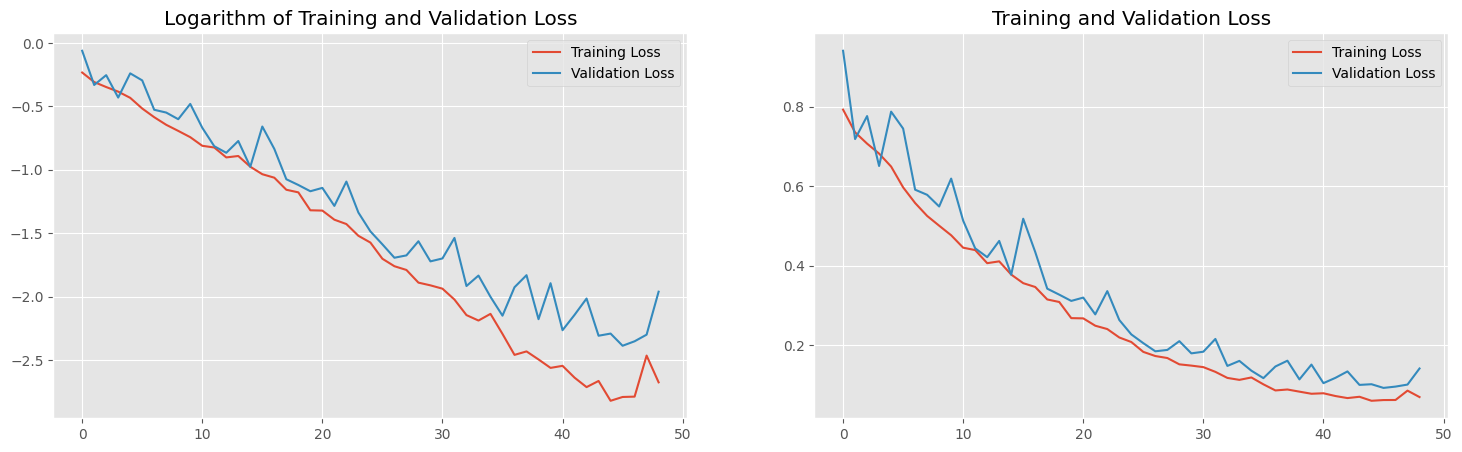

In [8]:
epochs_run=len(history.epoch)
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()

In [9]:
results = fcn0.evaluate(test_data, batch_size=128)
print("test loss, test acc:", results)

15/15 [==============================] - 3s 165ms/step - loss: 0.4028 - binary_accuracy: 0.8022
test loss, test acc: [0.40282782912254333, 0.8022222518920898]


In [10]:
def FCN_model2(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding="valid", input_shape=shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(tf.keras.layers.Conv2D(filters=119, kernel_size=3, strides=1))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(tf.keras.layers.Conv2D(filters=340, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=356, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


    model.add(tf.keras.layers.Conv2D(filters=110, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=129, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    
    model.add(tf.keras.layers.Conv2D(filters=369, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))


    model.add(tf.keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalMaxPooling2D())
    model.add(tf.keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model


In [11]:
fcn1=FCN_model2(len_classes=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 225, 225, 256)     2560      
                                                                 
 batch_normalization_2 (Batc  (None, 225, 225, 256)    1024      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 225, 225, 256)     0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 113, 113, 256)    0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 111, 111, 119)     274295    
                                                                 
 activation_10 (Activation)  (None, 111, 111, 119)    

In [12]:
fcn1.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [13]:
history1= fcn1.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 53s 585ms/step - loss: 0.8381 - binary_accuracy: 0.4916 - val_loss: 1.3665 - val_binary_accuracy: 0.4947
Epoch 2/100
89/89 [==============================] - 57s 636ms/step - loss: 0.7442 - binary_accuracy: 0.5199 - val_loss: 0.6554 - val_binary_accuracy: 0.6265
Epoch 3/100
89/89 [==============================] - 52s 583ms/step - loss: 0.7173 - binary_accuracy: 0.5507 - val_loss: 1.1313 - val_binary_accuracy: 0.5160
Epoch 4/100
89/89 [==============================] - 52s 583ms/step - loss: 0.6779 - binary_accuracy: 0.5869 - val_loss: 0.7842 - val_binary_accuracy: 0.5053
Epoch 5/100
89/89 [==============================] - 52s 582ms/step - loss: 0.6531 - binary_accuracy: 0.6179 - val_loss: 0.6408 - val_binary_accuracy: 0.5970
Epoch 6/100
89/89 [==============================] - 52s 582ms/step - loss: 0.6050 - binary_accuracy: 0.6793 - val_loss: 0.7088 - val_binary_accuracy: 0.5053
Epoch 7/100
89/89 [==============================] -

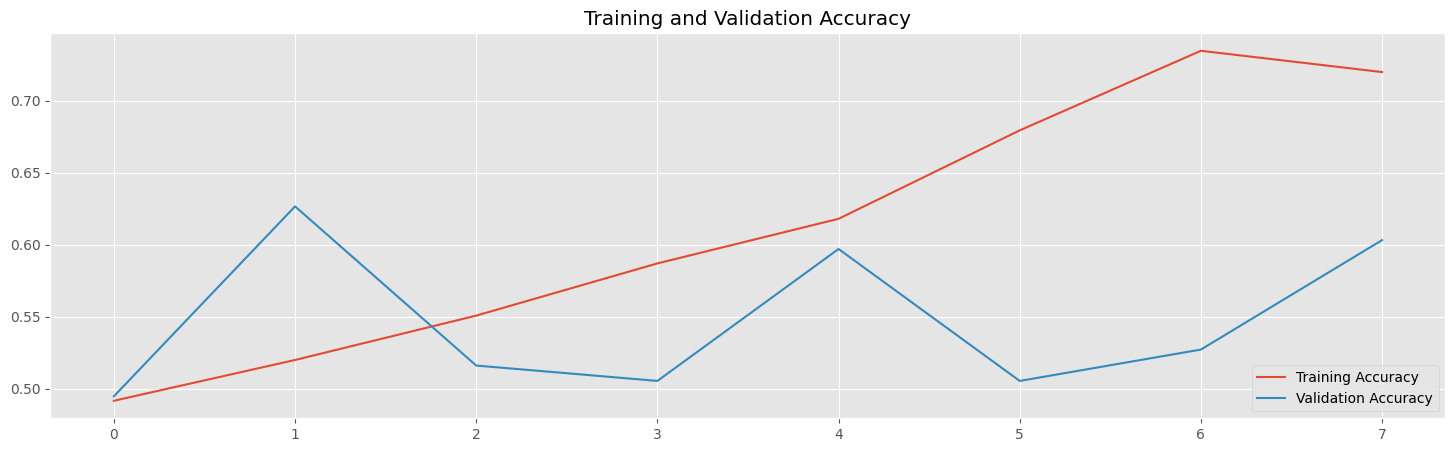

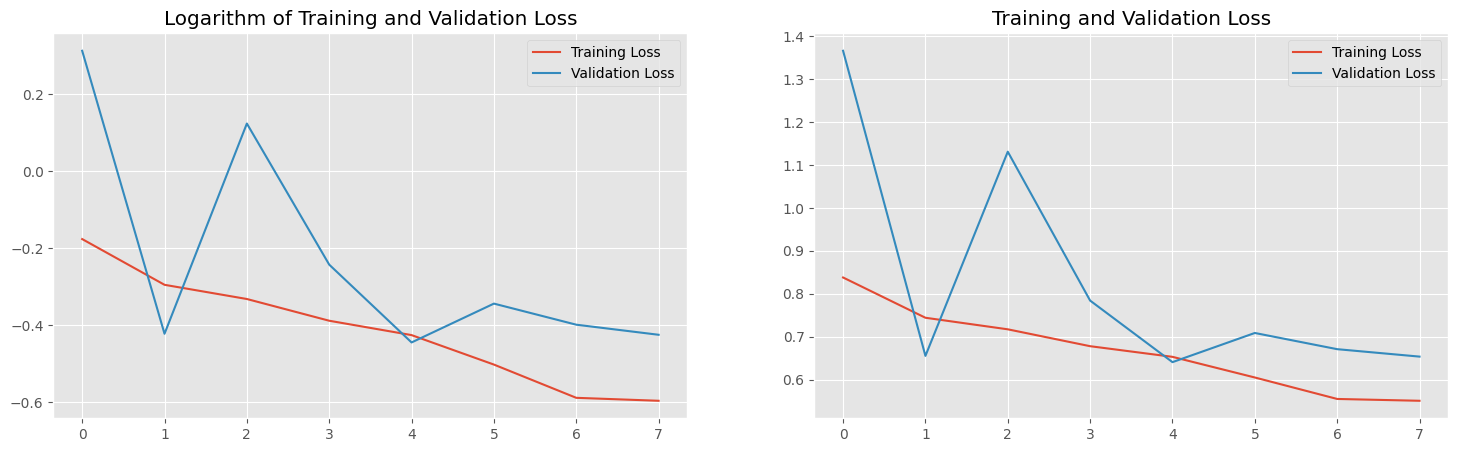

In [14]:
epochs_run=len(history1.epoch)
acc = history1.history['binary_accuracy']
val_acc = history1.history['val_binary_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()

In [15]:
def FCN_model3(len_classes=3, shape=(227, 227, 1), dropout_rate=0.2):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", input_shape=shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))


    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    # model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))


    model.add(tf.keras.layers.Conv2D(filters=math.ceil(math.log(len_classes,2)), kernel_size=1, strides=1))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.GlobalMaxPooling2D())
    model.add(tf.keras.layers.Activation('sigmoid'))

    print(model.summary())
    print(f'Total number of layers: {len(model.layers)}')

    return model


In [16]:
fcn2=FCN_model3(len_classes=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 225, 225, 64)      640       
                                                                 
 batch_normalization_4 (Batc  (None, 225, 225, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_18 (Activation)  (None, 225, 225, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 111, 111, 64)      36928     
                                                                 
 activation_19 (Activation)  (None, 111, 111, 64)     

In [17]:
fcn2.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [18]:
history2= fcn2.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 20s 193ms/step - loss: 0.8039 - binary_accuracy: 0.4910 - val_loss: 0.7213 - val_binary_accuracy: 0.4947
Epoch 2/100
89/89 [==============================] - 15s 172ms/step - loss: 0.7515 - binary_accuracy: 0.5165 - val_loss: 0.6940 - val_binary_accuracy: 0.5177
Epoch 3/100
89/89 [==============================] - 15s 172ms/step - loss: 0.7132 - binary_accuracy: 0.5389 - val_loss: 0.7301 - val_binary_accuracy: 0.5053
Epoch 4/100
89/89 [==============================] - 15s 172ms/step - loss: 0.6777 - binary_accuracy: 0.5778 - val_loss: 0.6784 - val_binary_accuracy: 0.5929
Epoch 5/100
89/89 [==============================] - 15s 172ms/step - loss: 0.6537 - binary_accuracy: 0.6334 - val_loss: 0.6529 - val_binary_accuracy: 0.6549
Epoch 6/100
89/89 [==============================] - 15s 172ms/step - loss: 0.6609 - binary_accuracy: 0.6003 - val_loss: 0.7180 - val_binary_accuracy: 0.5053
Epoch 7/100
89/89 [==============================] -

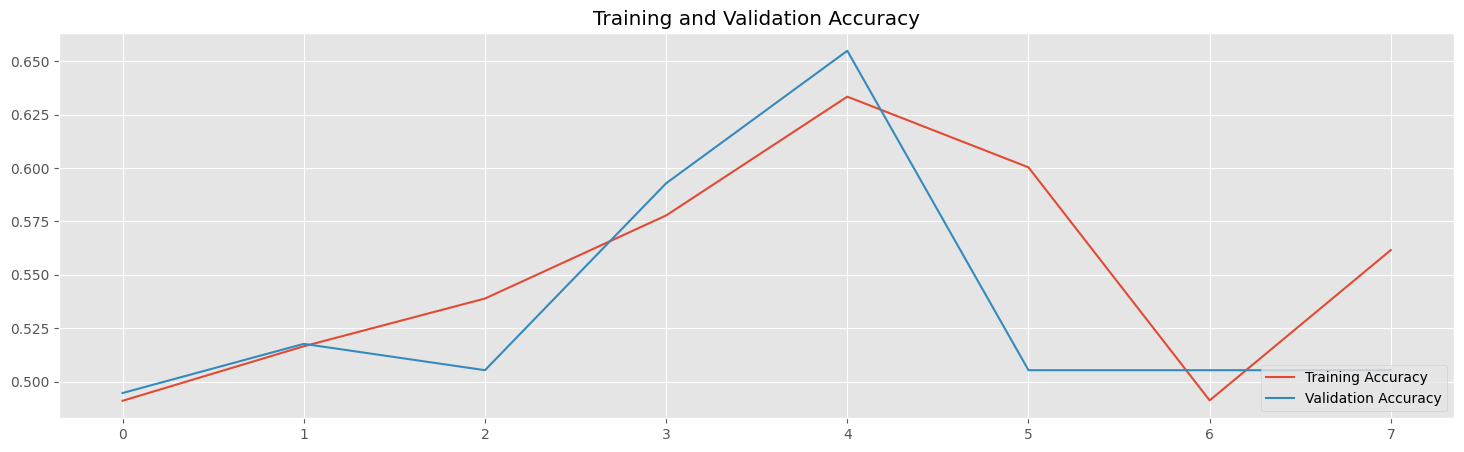

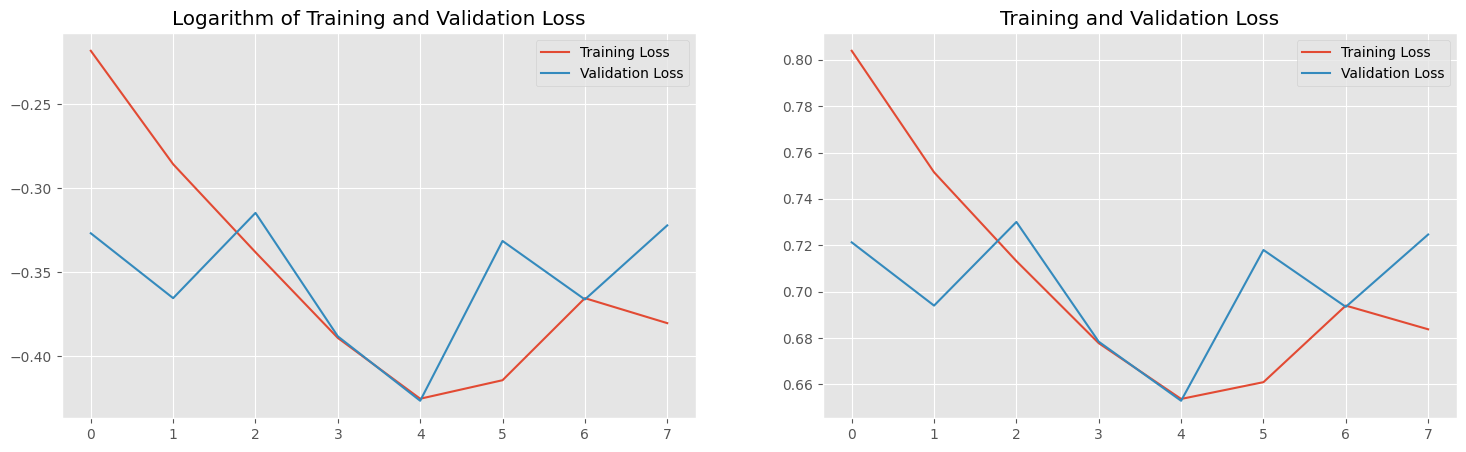

In [19]:
epochs_run=len(history2.epoch)
acc = history2.history['binary_accuracy']
val_acc = history2.history['val_binary_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()

In [20]:
results1 = fcn1.evaluate(test_data, batch_size=128)
print("test loss, test acc:", results1)

15/15 [==============================] - 2s 136ms/step - loss: 0.6975 - binary_accuracy: 0.5433
test loss, test acc: [0.697482168674469, 0.5433333516120911]


In [21]:
results2 = fcn2.evaluate(test_data, batch_size=128)
print("test loss, test acc:", results2)

15/15 [==============================] - 1s 56ms/step - loss: 0.7306 - binary_accuracy: 0.5556
test loss, test acc: [0.730596661567688, 0.5555555820465088]
